# Programming in Python
## Exam: September 8, 2021


You can solve the exercises below by using standard Python 3.9 libraries, NumPy, Matplotlib, Pandas, PyMC3.
You can browse the documentation: [Python](https://docs.python.org/3.9/), [NumPy](https://numpy.org/doc/stable/user/index.html), [Matplotlib](https://matplotlib.org/3.3.1/contents.html), [Pandas](https://pandas.pydata.org/pandas-docs/version/1.2.5/), [PyMC3](https://docs.pymc.io/).
You can also look at the [slides of the course](https://homes.di.unimi.it/monga/lucidi2021/pyqb00.pdf) or your code on [GitHub](https://github.com).

**It is forbidden to communicate with others.** 


In [1]:
%matplotlib inline
import numpy as np   # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc3 as pm   # type: ignore

### Exercise 1 (max 5 points)

The file [hudson-bay-lynx-hare.csv](hudson-bay-lynx-hare.csv) contains data about the populations of hare and lynx in the Hudson bay, collected from 1900 to 1920. Unfortunately, the file has a format you can't parse directly with pandas `read_csv`. Read the file with proper python code (without changing it with other tools) and put the data in a pandas DataFrame.

In [7]:
records = []
with open('hudson-bay-lynx-hare.csv') as f:
    for line in f:
        if not line.startswith('#'):
            line = line.strip()
            line = line.replace(';', ',')
            records.append(line.split(","))
            
data = pd.DataFrame(records[1:], 
                    columns=[label.strip() for label in records[0]], 
                    dtype=float)

In [10]:
records = []
with open('hudson-bay-lynx-hare.csv') as f:
    for line in f:
        if not line.startswith('#'):
            line = line.strip().replace(';', ',')
            records.append(line.split(","))
            
data = pd.DataFrame(records[1:], 
                    columns=[label.strip() for label in records[0]], 
                    dtype=float)

In [4]:
data.index

RangeIndex(start=0, stop=21, step=1)

### Exercise 2 (max 3 points)


Plot the populations of hare and lynx over the years. Be sure the ticks on $x$ axis is every two years (1900, 1902, etc.)

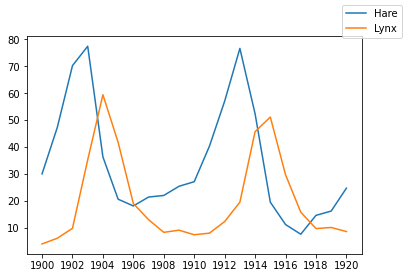

In [5]:
fig, ax = plt.subplots()

ax.plot(data['Year'], data['Hare'], label='Hare')
ax.plot(data['Year'], data['Lynx'], label='Lynx')

ax.set_xticks(data['Year'][0::2])
    
_ = fig.legend()

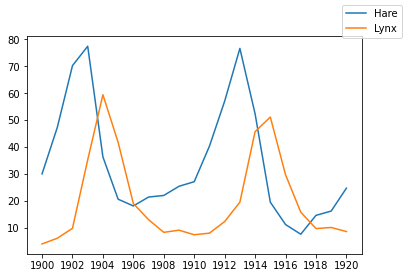

In [8]:
fig, ax = plt.subplots()
for a in ('Hare', 'Lynx'):
    ax.plot(data['Year'], data[a], label=a)

ax.set_xticks(data['Year'][0::2])
    
_ = fig.legend()

### Exercise 3 (max 3 points)

The following `e_approx_vl` function computes the Euler approximation for a Lotka-Volterra system of differential equations. The `epsilon`s control the grow of the two species, the `gamma`s control how each species impact on the other. Use it to get the Lotka-Volterra solutions on a 2000 points time scale, for a system with epsilons at $0.55$ and $0.84$, gammas at $0.026$ and $0.028$ and initial values $4$ and $30$. Be sure to use values that fit correctly the type hints of the function. 

In [9]:
def e_approx_vl(epsilon: tuple[float, float], gamma: tuple[float, float],
                t: np.ndarray,
                init: tuple[int, int]) -> tuple[np.ndarray, np.ndarray]:
    
    """Return the Euler approximation for a Lotka-Volterra system of ODE.
    """
    
    assert epsilon[0] > 0 and epsilon[1] > 0
    assert gamma[0] > 0 and gamma[1] > 0
    assert init[0] > 0 and init[1] > 0

    s = np.zeros_like(t)
    w = np.zeros_like(t)
    
    s[0], w[0] = init
    
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        s[i] = s[i-1] + dt*(epsilon[0] - gamma[1]*w[i-1])*s[i-1]
        w[i] = w[i-1] + dt*(-epsilon[1] + gamma[0]*s[i-1])*w[i-1]
        
    return s, w

In [10]:
time = np.linspace(1900, 1920, 2000)

lv_data = e_approx_vl(epsilon=(0.55, 0.84), 
                      gamma=(0.026, 0.028),
                      t=time,
                      init=(4,30))


In [11]:
lv_data[1]

array([30.        , 29.77908954, 29.5597159 , ...,  3.59083354,
        3.64591489,  3.70223044])

### Exercise 4 (max 4 points)

Plot the solutions computed in Exercise 3 together with the data on hare and lynx. Make the plot in a way that makes possibile to visually compare the observed population and the Lotka-Volterra model solutions.

In [12]:
data

,Year,Lynx,Hare
0,1900.0,4.0,30.0
1,1901.0,6.1,47.2
2,1902.0,9.8,70.2
3,1903.0,35.2,77.4
4,1904.0,59.4,36.3
5,1905.0,41.7,20.6
6,1906.0,19.0,18.1
7,1907.0,13.0,21.4
8,1908.0,8.3,22.0
9,1909.0,9.1,25.4


Hare
Lynx


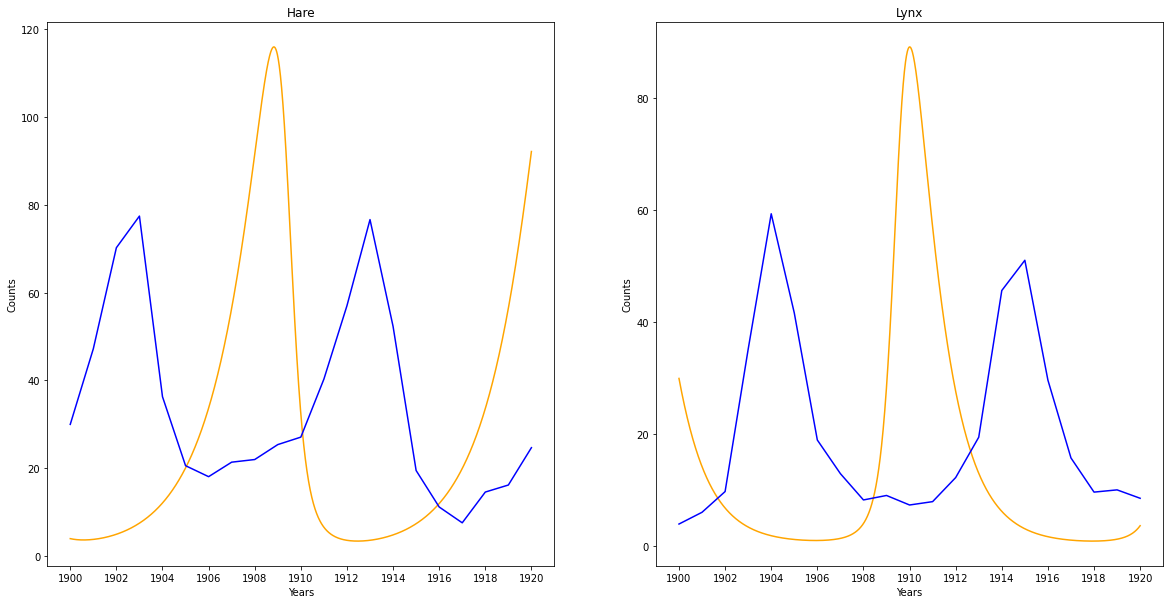

In [13]:
fig,ax=plt.subplots(1,2, figsize=(20,10))
for i,a in enumerate(('Hare','Lynx')):
    
    _=ax[i].plot(time, lv_data[i], color='orange')
    _=ax[i].plot(data['Year'], data[a], color='blue')
    _=ax[i].set_title(a)
    _=ax[i].set_xlabel('Years')
    _=ax[i].set_ylabel('Counts')
    _=ax[i].set_xticks(data['Year'][0::2])
    print(a)

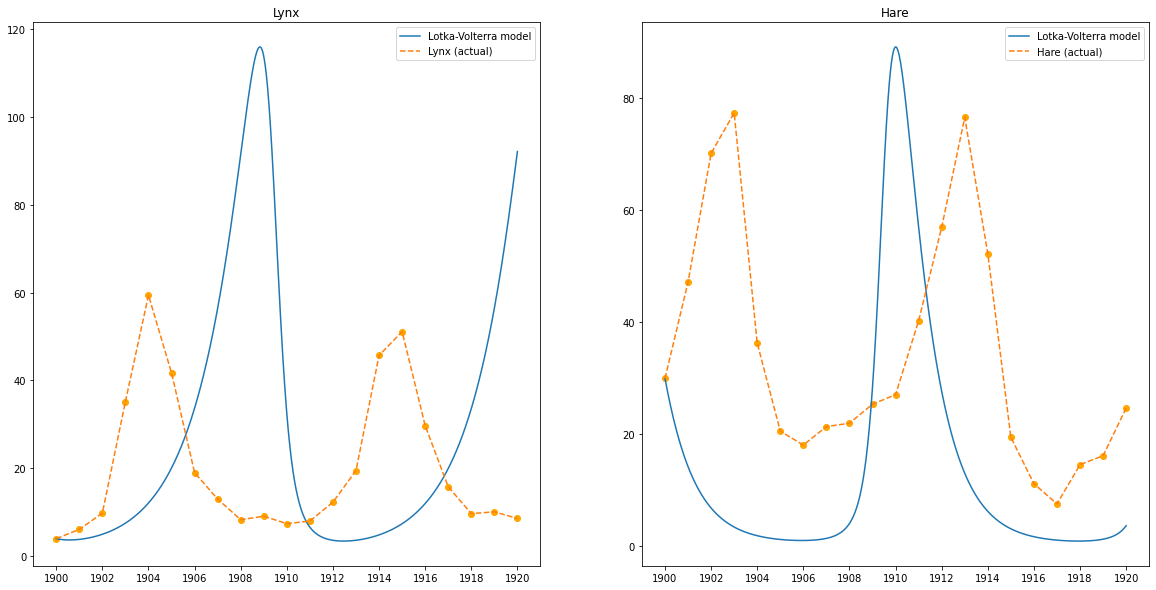

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

for i, a in enumerate(('Lynx', 'Hare')):
    ax[i].set_title(a)
    ax[i].plot(time, lv_data[i], label='Lotka-Volterra model')
    ax[i].scatter(data['Year'], data[a], color='orange')
    ax[i].plot(data['Year'], data[a], label=f'{a} (actual)', linestyle='dashed')
    ax[i].set_xticks(data['Year'][0::2])
    ax[i].legend()

### Exercise 5 (max 7 points)

Define a function `lv_error` two (not empty) arrays: the first should be longer than the second and both represent the same "curve", but the first is more "detailed". The function returns the average sum of the absolute values of the differences between *some* specific points in the first array and the *corresponding* points in the second. The first points in both arrays correspond, the others corresponding points are equally spaced. For example if the first array is $1,2,3,4,5,6,7,8,9,10$ and the second array $0.1,0.2,0.3$, then the corresponding point are:

| .   |  .  |  .  |  .  | .   | .   | .   | .   | .   | . |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |  
| $1$   |  $2$ |  $3$ | $4$ | $5$   | $6$ | $7$ | $8$ | $9$   | $10$ |
| $0.1$ | .    | .    | .   | $0.2$ | .   | .   | .   | $0.3$ | .    |


The result in this case would be: $|1-0.1| + |5-0.2| + |9-0.3| = 14.4 / 3 = 4.8$. If, instead, the second array were $0.1, 0.2$, the $0.2$ would correspond to $10$ and the final result would be $|1-0.1| + |10-0.2| = 8.5$. With the second array as $0.1, 0.2, 0.3, 0.4$ the result would be $5.25$. 

To get the full marks, you should declare correctly the type hints (the signature of the function) and add a doctest string.


In [15]:
16//4

4

In [16]:
def lv_error(a: np.ndarray, b: np.ndarray) -> float:
    """Returns the average sum of the absolute values of the differences 
    between *some* specific points in the first array and the *corresponding* points in the second.
    
    >>> lv_error(np.arange(1, 11),  np.array([0.1, 0.2, 0.3]))
    4.8
    
    >>> abs(lv_error(np.arange(1, 11),  np.array([0.1, 0.2])) - 5.35) < 1e-5
    True
    >>> (lv_error(np.arange(1, 11),  np.array([0.1, 0.2, 0.3, 0.4])) - 5.25) < 1e-5
    True
    
    """
    assert len(a) > len(b)
    d = len(a) - len(b)
    step = (d // (len(b) - 1)) +1
    
    seq = []
    j = 0
    for i in range(0, len(a), step):
        seq.append(abs(a[i] - b[j]))
        j = j + 1
        
    
    return np.array(seq).mean()

### Exercise 6 (max 3 points)

Using the function defined in Exercise 5, compute the `lv_error` for the model solutions of the Lotka-Volterra system defined in Exercise 3 with respect to the observed data.

In [17]:
lv_error(lv_data[0], data['Lynx']),lv_error(lv_data[1], data['Hare']) 

(30.833493276280663, 27.60244432731688)

### Exercise 7 (max 5 points)

Add to the observed data a column with the ratio between the standardized number of hare and the standardized number of lynx. The standardize number is the difference between the deviation of an observed datum with respect to the observed mean, divided by the standard deviation of the observed data. To get the full marks define a function to get the standardized number and use that for computing the new column.

In [18]:
def standardize(sample: float, population: np.ndarray) -> float:
    """Return the standardized measure, with respect to the population.
    """
    
    return (sample - population.mean()) / population.std()

In [19]:
data['Hare_std'] = data['Hare'].apply(lambda x: standardize(x, data['Hare']))
data['Lynx_std'] = data['Lynx'].map(lambda x: standardize(x, data['Lynx']))

data['ratio'] = data['Hare_std'] / data['Lynx_std']

data

,Year,Lynx,Hare,Hare_std,Lynx_std,ratio
0,1900.0,4.0,30.0,-0.190574,-0.970621,0.196343
1,1901.0,6.1,47.2,0.612639,-0.844541,-0.725411
2,1902.0,9.8,70.2,1.686704,-0.622398,-2.710007
3,1903.0,35.2,77.4,2.022933,0.902578,2.241284
4,1904.0,59.4,36.3,0.103626,2.355508,0.043993
5,1905.0,41.7,20.6,-0.629540,1.292827,-0.486948
6,1906.0,19.0,18.1,-0.746286,-0.070045,10.654404
7,1907.0,13.0,21.4,-0.592181,-0.430275,1.376284
8,1908.0,8.3,22.0,-0.564162,-0.712456,0.791855
9,1909.0,9.1,25.4,-0.405387,-0.664425,0.610132


### Exercise 8 (max 3 points)

Consider this statistical model: the ratio computed in Exercise 7 is normally distributed, with an unknown mean, and a standard deviation of 1. Your *a priori* estimation of the mean is a normal distribution with mean 0 and standard deviation 1. Use PyMC to sample the posterior distributions after having seen the actual values of the ratio.  Plot the results.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.
/Users/andreameraviglia/.local/share/virtualenvs/file-DyBG5nAN/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'mu'}>

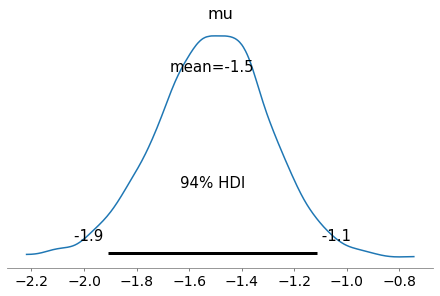

In [62]:
mymodel = pm.Model()

with mymodel:
    mu = pm.Normal('mu', 0, 1)
    ratio = pm.Normal('ratio', mu, 1, observed=data['ratio'])
    
    post = pm.sample(return_inferencedata=False)
    
pm.plot_posterior(post)

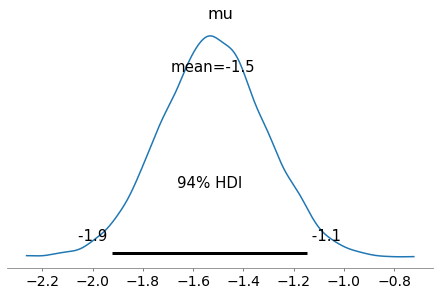

In [12]:
with mymodel:
    pm.plot_posterior(post)